In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy

In [4]:
#Envirnoment specs
print('Environment specification:\n')
print('python', '%s.%s.%s' % sys.version_info[:3])

for mod in np, scipy, sns, pd:
    print(mod.__name__, mod.__version__)

Environment specification:

python 3.8.12
numpy 1.19.5
scipy 1.7.3
seaborn 0.11.2
pandas 1.3.5


In [9]:
training = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

In [6]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [12]:
data_num = training[['Age', 'SibSp', 'Parch', 'Fare']]
data_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

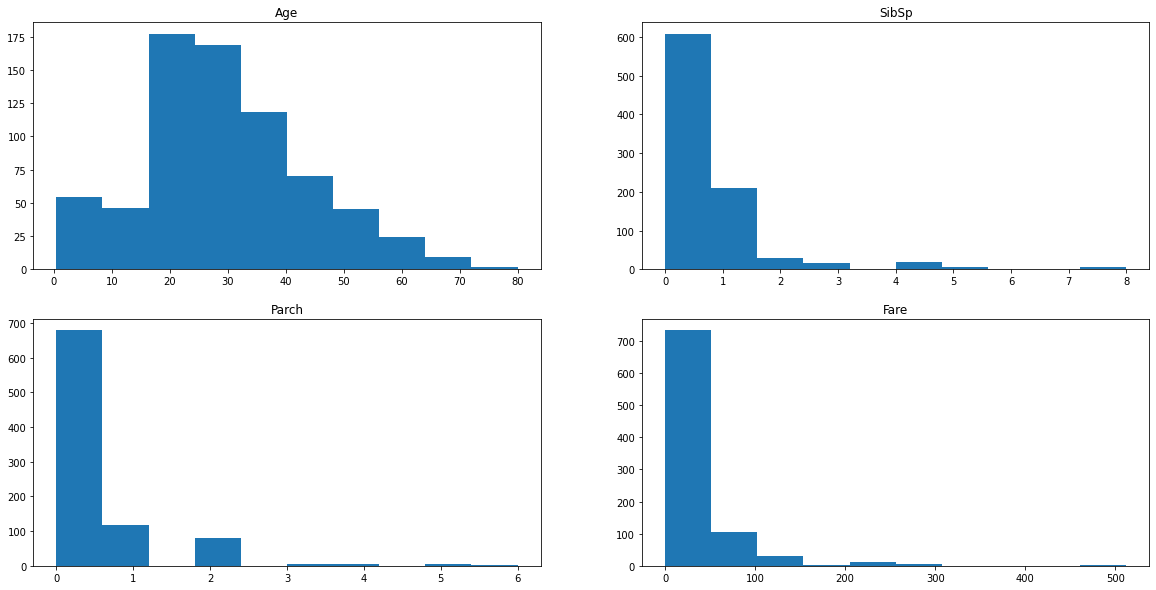

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))

axs[0, 0].hist(training['Age'])
axs[0, 0].set_title('Age')
axs[0, 1].hist(training['SibSp'])
axs[0, 1].set_title('SibSp')
axs[1, 0].hist(training['Parch'])
axs[1, 0].set_title('Parch')
axs[1, 1].hist(training['Fare'])
axs[1, 1].set_title('Fare');

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


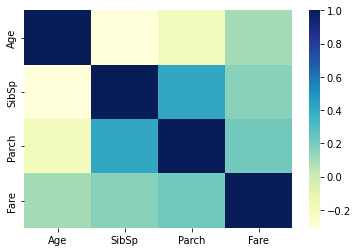

In [32]:
print(data_num.corr())
sns.heatmap(data_num.corr(), cmap="YlGnBu");

In [33]:
pd.pivot_table(training, index = 'Survived')

,Age,Fare,Parch,PassengerId,Pclass,SibSp,train_test
Survived,,,,,,,
0,30.626179,22.117887,0.329690,447.016393,2.531876,0.553734,1
1,28.343690,48.395408,0.464912,444.368421,1.950292,0.473684,1


/home/kris06/.pyenv/versions/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


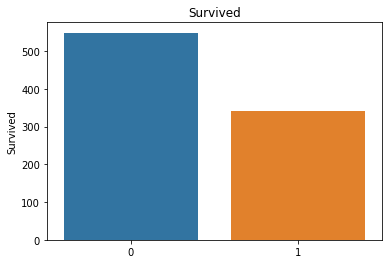

/home/kris06/.pyenv/versions/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


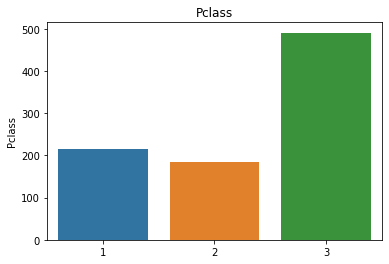

/home/kris06/.pyenv/versions/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


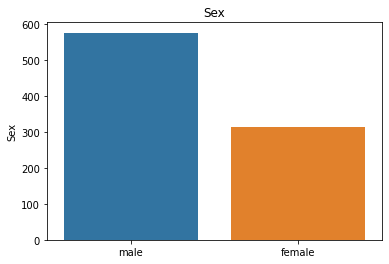

/home/kris06/.pyenv/versions/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


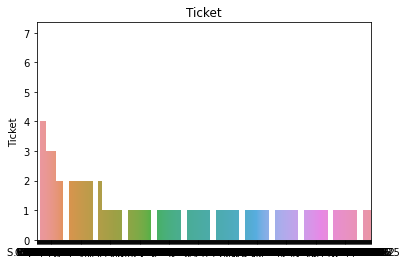

/home/kris06/.pyenv/versions/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


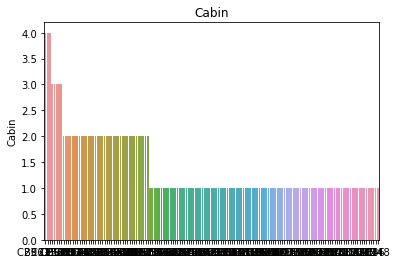

/home/kris06/.pyenv/versions/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


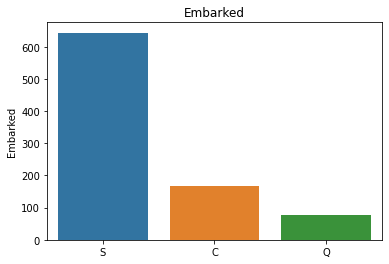

In [46]:
for i in data_cat.columns:
    sns.barplot(data_cat[i].value_counts().index,data_cat[i].value_counts()).set_title(i)
    plt.show();

In [49]:
print(pd.pivot_table(training, index = 'Survived',
                     columns = 'Pclass',
                     values = 'Ticket' ,
                     aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived',
                     columns = 'Sex',
                     values = 'Ticket' ,
                     aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived',
                     columns = 'Embarked',
                     values = 'Ticket' ,
                     aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [50]:
data_cat.Cabin
training['cabin_multiple'] = training.Cabin.apply(lambda x:0 if pd.isna(x)
                                                  else len(x.split(' ')))
training['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [52]:
pd.pivot_table(training, index = 'Survived',
               columns = 'cabin_multiple',
               values = 'Ticket' ,
               aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [53]:
training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])

In [55]:
print(training.cabin_adv.value_counts())
pd.pivot_table(training,index='Survived',
               columns='cabin_adv',
               values = 'Name',
               aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [62]:
training['numeric_ticket'] = training.Ticket.apply(
    lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training.Ticket.apply(
    lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() 
    if len(x.split(' ')[:-1]) >0 else 0)

In [63]:
training['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [64]:
pd.set_option("max_rows", None)
training['ticket_letters'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: ticket_letters, dtype: int64

In [66]:
pd.pivot_table(training,index='Survived',
               columns='numeric_ticket',
               values = 'Ticket',
               aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [67]:
pd.pivot_table(training, index='Survived',
              columns='ticket_letters',
              values= 'Ticket',
              aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [69]:
training['name_title'] = training.Name.apply(
    lambda x: x.split(',')[1].split('.')[0].strip())

In [70]:
training['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: name_title, dtype: int64